In [636]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [637]:
stu_perf= pd.read_csv("D:\\Aopenclassroom\\p8\\archive/StudentsPerformance.csv")
stu_perf

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [644]:
plt.bar(stu_perf)
plt.show()

TypeError: bar() missing 1 required positional argument: 'height'

# netoyage des données

In [645]:
stu_perf.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [646]:
stu_perf.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [647]:
stu_perf.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [648]:
#rajouter une colonne score
stu_perf['score']=stu_perf[['math score','reading score','writing score']].mean(axis=1)
stu_perf

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


## rempalcer les valeurs par des chiffres 

In [649]:
stu_perf.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
score                          0
dtype: int64

In [650]:
stu_perf['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [651]:
stu_perf['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [652]:
stu_perf_map=stu_perf.copy()

In [653]:
stu_perf_map.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
score                          0
dtype: int64

In [654]:
stu_perf_map

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


In [655]:
stu_perf_map['parental level of education']= stu_perf_map['parental level of education'].map({'master\'s degree':'1',
                             'bachelor\'s degree':'2',
                             'associate\'s degree':'3',
                             'some college':'4',
                             'high school':'5',
                             'some high school':'6',                                                                
                             })

In [656]:
stu_perf_map['race/ethnicity'] = stu_perf_map['race/ethnicity'].map({'group A':'1',
                             'group B':'2',
                             'group C':'3',
                             'group D':'4',
                             'group E':'5'})

In [657]:
stu_perf_map['lunch'] = stu_perf_map['lunch'].map({'standard':'1',
                             'free/reduced':'0'})

In [658]:
stu_perf_map['test preparation course'] = stu_perf_map['test preparation course'].map({'none':'0',
                             'completed':'1'})

In [659]:
stu_perf_map['gender'] = stu_perf_map['gender'].map({'male':'0',
                             'female':'1'})

In [660]:
stu_perf_map.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,score
0,1,2,2,1,0,72,72,74,72.666667
1,1,3,4,1,1,69,90,88,82.333333
2,1,2,1,1,0,90,95,93,92.666667
3,0,1,3,0,0,47,57,44,49.333333
4,0,3,4,1,0,76,78,75,76.333333


In [661]:
stu_perf_map.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
score                          0
dtype: int64

In [662]:
stu_perf_scr=stu_perf[['gender','race/ethnicity','parental level of education','lunch','test preparation course','score']]

# analyses 

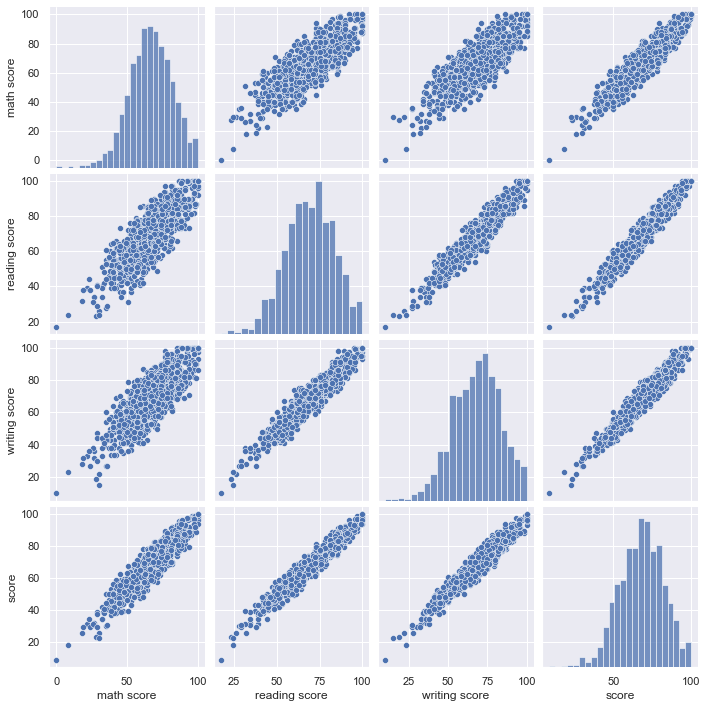

In [663]:
sns.pairplot(stu_perf,palette='flare')
plt.savefig("p8_figures/analyse multivarié.png")

## Genre

In [664]:
stu_perf.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [665]:

unique_gender_number=stu_perf["gender"].value_counts()
unique_gender_number

female    518
male      482
Name: gender, dtype: int64

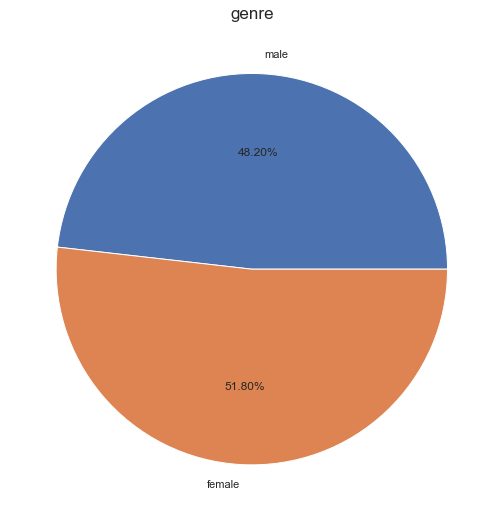

In [666]:
#define data

#define Seaborn color palette to use

color=sns.color_palette("flare", as_cmap=True)

values=[482,518]
labels=["male","female"]
plt.pie(values,labels=labels,autopct='%1.2f%%')

#patches, texts = plt.pie( colors=colors, shadow=True, startangle=90)
plt.title("genre", fontsize = 17)
plt.savefig("p8_figures/genre.png")
sns.set(rc={'figure.figsize':(6,6)})
plt.show()

NameError: name 'c' is not defined

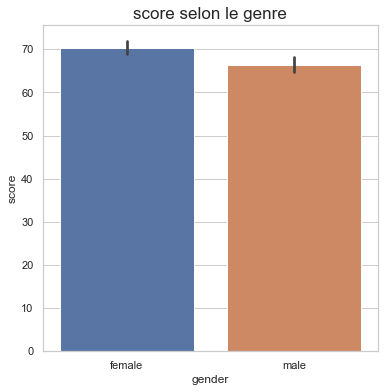

In [667]:
from numpy import median
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(x="gender", y="score", data=stu_perf_scr,estimator=median)
colors = sns.color_palette('Set1')[0:5]
ax.set_title("score selon le genre", fontsize = 17)
c
sns.set(rc={'figure.figsize':(6,4)})


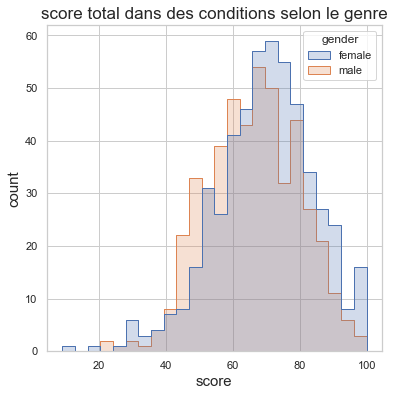

In [668]:
ax =sns.histplot(stu_perf_scr, x="score", hue="gender", element="step")
ax.set_xlabel('score', fontsize = 15)
ax.set_ylabel('count', fontsize = 15)
ax.set_title("score total dans des conditions selon le genre", fontsize = 17)
sns.set(rc={'figure.figsize':(6,4)})
plt.savefig("p8_figures/hist score vs genre.png")


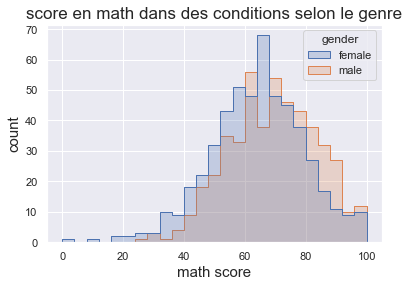

In [669]:
ax =sns.histplot(stu_perf, x="math score", hue="gender", element="step")
ax.set_xlabel('math score', fontsize = 15)
ax.set_ylabel('count', fontsize = 15)
ax.set_title("score en math dans des conditions selon le genre", fontsize = 17)
sns.set(rc={'figure.figsize':(6,6)})
 
plt.savefig("p8_figures/hist math score vs genre.png")

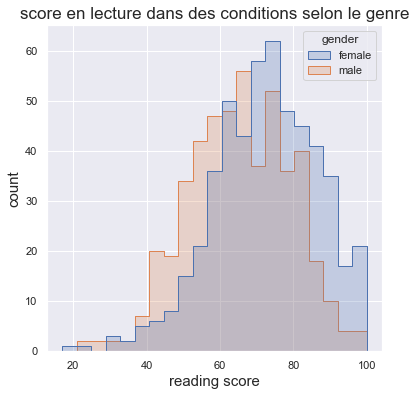

In [670]:
ax =sns.histplot(stu_perf, x="reading score", hue="gender", element="step")
ax.set_xlabel('reading score', fontsize = 15)
ax.set_ylabel('count', fontsize = 15)
ax.set_title("score en lecture dans des conditions selon le genre", fontsize = 17)
sns.set(rc={'figure.figsize':(6,6)})
 
plt.savefig("p8_figures/hist reading score vs genre.png")
 

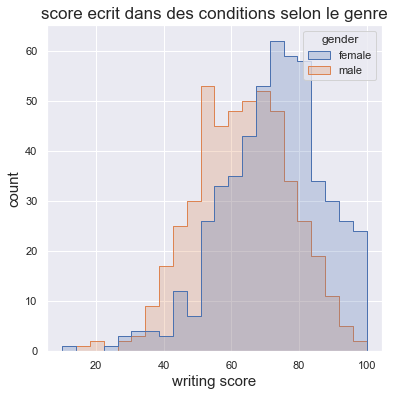

In [671]:
ax =sns.histplot(stu_perf, x="writing score", hue="gender", element="step")
ax.set_xlabel('writing score', fontsize = 15)
ax.set_ylabel('count', fontsize = 15)
ax.set_title("score ecrit dans des conditions selon le genre", fontsize = 17)
sns.set(rc={'figure.figsize':(6,6)})
 
plt.savefig("p8_figures/hist writing score vs genre.png")
 

### type du repas

In [672]:

unique_rep_number=stu_perf["lunch"].value_counts()
unique_rep_number

standard        645
free/reduced    355
Name: lunch, dtype: int64

AttributeError: 'function' object has no attribute 'pie'

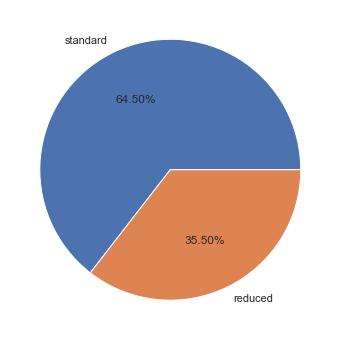

In [673]:
colors = sns.color_palette('Set1')

values=[645,355]
labels=["standard","reduced"]
plt.pie(values,labels=labels,autopct='%1.2f%%')
plt.plot.pie(colors = ['orange', 'gray'])
plt.title("lunch", fontsize = 17)
plt.savefig("p8_figures/repas.png")
sns.set(rc={'figure.figsize':(6,6)})
plt.show()

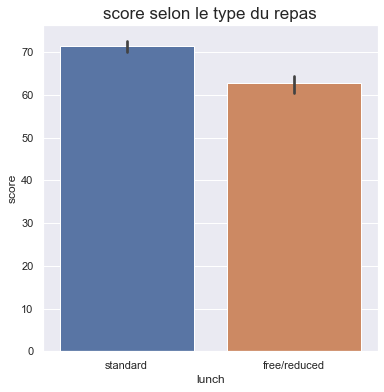

In [674]:
from numpy import median
#sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(x="lunch", y="score", data=stu_perf_scr,estimator=median)
ax.set_title("score selon le type du repas", fontsize = 17)
plt.savefig("p8_figures/math score vs lunch.png")
sns.set(rc={'figure.figsize':(6,4)})

### selon le suivie des cours de preparation a l examen 

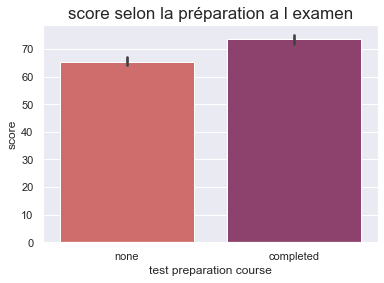

In [675]:
from numpy import median
#sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(x="test preparation course", y="score", data=stu_perf_scr,estimator=median, palette="flare")
ax.set_title("score selon la préparation a l examen", fontsize = 17)
plt.savefig("p8_figures/score vs lunch.png")
sns.set(rc={'figure.figsize':(4,4)})

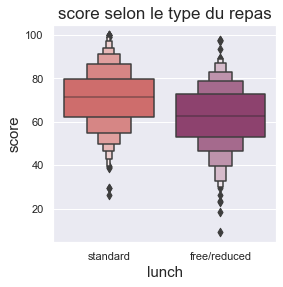

In [676]:
ax = sns.boxenplot(x="lunch", y="score",
                   data=stu_perf_scr, palette="flare")
ax.set_xlabel('lunch', fontsize = 15)
ax.set_ylabel('score', fontsize = 15)
ax.set_title("score selon le type du repas", fontsize = 17)
plt.savefig("p8_figures/score vs lunch.png")
sns.set(rc={'figure.figsize':(4,6)})

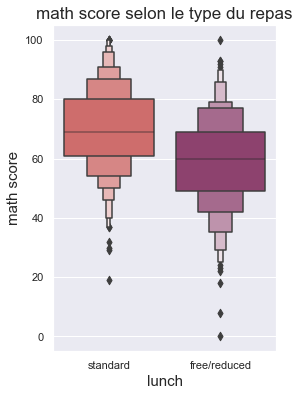

In [677]:
ax = sns.boxenplot(x="lunch", y="math score",
                   data=stu_perf, palette="flare")
ax.set_xlabel('lunch', fontsize = 15)
ax.set_ylabel('math score', fontsize = 15)
ax.set_title("math score selon le type du repas", fontsize = 17)
plt.savefig("p8_figures/math score vs lunch.png")
sns.set(rc={'figure.figsize':(4,6)})

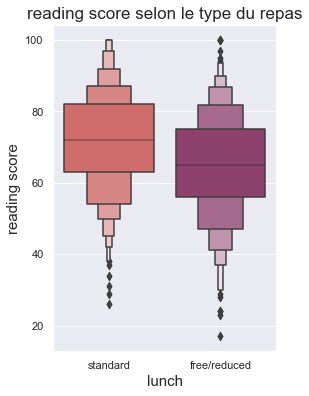

In [678]:
ax = sns.boxenplot(x="lunch", y="reading score",
                   data=stu_perf, palette="flare")
ax.set_xlabel('lunch', fontsize = 15)
ax.set_ylabel('reading score', fontsize = 15)
ax.set_title("reading score selon le type du repas", fontsize = 17)
plt.savefig("p8_figures/reading score vs lunch.png")
sns.set(rc={'figure.figsize':(4,6)})

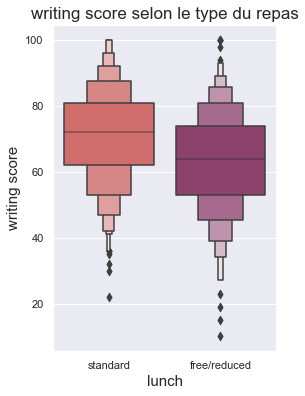

In [679]:
ax = sns.boxenplot(x="lunch", y="writing score",
                   data=stu_perf, palette="flare")
ax.set_xlabel('lunch', fontsize = 15)
ax.set_ylabel('writing score', fontsize = 15)
ax.set_title("writing score selon le type du repas", fontsize = 17)
plt.savefig("p8_figures/score vs lunch.png")
sns.set(rc={'figure.figsize':(4,6)})

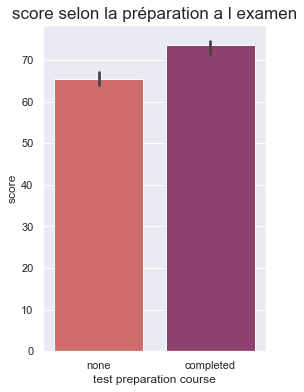

In [680]:
from numpy import median
#sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(x="test preparation course", y="score", data=stu_perf_scr,estimator=median, palette="flare")
ax.set_title("score selon la préparation a l examen", fontsize = 17)
plt.savefig("p8_figures/score vs lunch.png")
sns.set(rc={'figure.figsize':(4,4)})

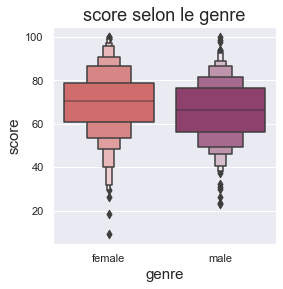

In [681]:

ax = sns.boxenplot(x="gender", y="score",
                   data=stu_perf_scr, palette="flare")
ax.set_xlabel('genre', fontsize = 15)
ax.set_ylabel('score', fontsize = 15)
ax.set_title("score selon le genre", fontsize = 18)
plt.savefig("p8_figures/score vs genre.png")
sns.set(rc={'figure.figsize':(4,4)})

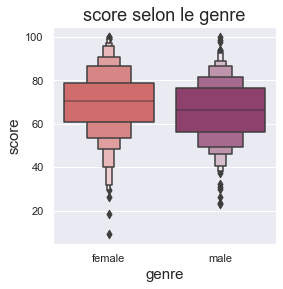

In [682]:


ax = sns.boxenplot(x="gender", y="score",
                   data=stu_perf_scr, palette="flare")
ax.set_xlabel('genre', fontsize = 15)
ax.set_ylabel('score', fontsize = 15)
ax.set_title("score selon le genre", fontsize = 18)
plt.savefig("p8_figures/score vs genre.png")
sns.set(rc={'figure.figsize':(4,4)})

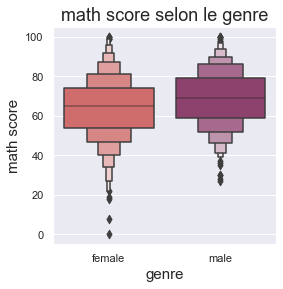

In [683]:


ax = sns.boxenplot(x="gender", y="math score",
                   data=stu_perf, palette="flare")
ax.set_xlabel('genre', fontsize = 15)
ax.set_ylabel('math score', fontsize = 15)
ax.set_title("math score selon le genre", fontsize = 18)
plt.savefig("p8_figures/math score vs genre.png")
sns.set(rc={'figure.figsize':(4,4)})

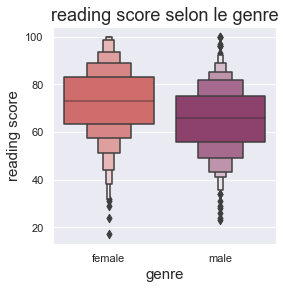

In [684]:
ax = sns.boxenplot(x="gender", y="reading score",
                   data=stu_perf, palette="flare")
ax.set_xlabel('genre', fontsize = 15)
ax.set_ylabel('reading score', fontsize = 15)
ax.set_title("reading score selon le genre", fontsize = 18)
plt.savefig("p8_figures/ reading score vs genre.png")
sns.set(rc={'figure.figsize':(4,5)})

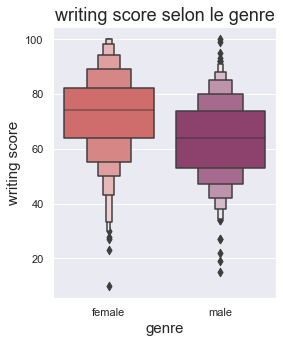

In [685]:
ax = sns.boxenplot(x="gender", y="writing score",
                   data=stu_perf, palette="flare")
ax.set_xlabel('genre', fontsize = 15)
ax.set_ylabel('writing score', fontsize = 15)
ax.set_title("writing score selon le genre", fontsize = 18)
plt.savefig("p8_figures/writing score vs genre.png")
sns.set(rc={'figure.figsize':(4,4)})

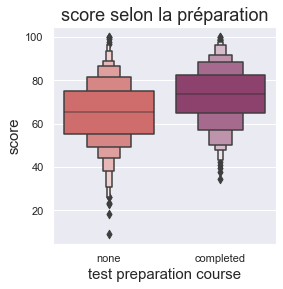

In [686]:

ax = sns.boxenplot(x="test preparation course", y="score",
                   data=stu_perf_scr, palette="flare")
ax.set_xlabel('test preparation course', fontsize = 15)
ax.set_ylabel('score', fontsize = 15)
ax.set_title("score selon la préparation", fontsize = 18)
plt.savefig("p8_figures/score vs test preparation course.png")
sns.set(rc={'figure.figsize':(6,6)})

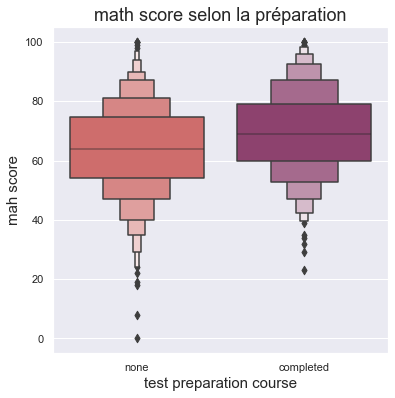

In [687]:
ax = sns.boxenplot(x="test preparation course", y="math score",
                   data=stu_perf, palette="flare")
ax.set_xlabel('test preparation course', fontsize = 15)
ax.set_ylabel('mah score', fontsize = 15)
ax.set_title("math score selon la préparation", fontsize = 18)
plt.savefig("p8_figures/math score vs test preparation cource.png")
sns.set(rc={'figure.figsize':(6,6)})

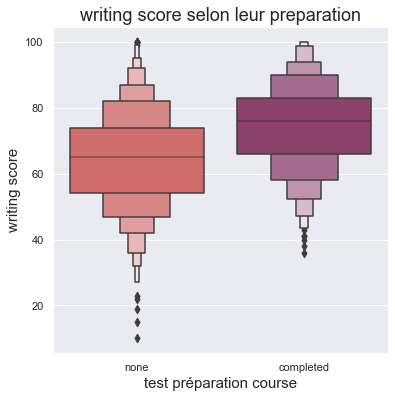

In [688]:
ax = sns.boxenplot(x="test preparation course", y="writing score",
                   data=stu_perf, palette="flare")
ax.set_xlabel('test préparation course', fontsize = 15)
ax.set_ylabel('writing score', fontsize = 15)
ax.set_title("writing score selon leur preparation", fontsize = 18)
plt.savefig("p8_figures/writing score vs test preparation cource.png")
sns.set(rc={'figure.figsize':(6,6)})

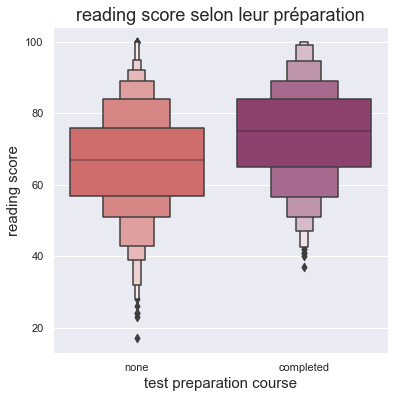

In [689]:
ax = sns.boxenplot(x="test preparation course", y="reading score",
                   data=stu_perf, palette="flare")
ax.set_xlabel('test preparation course', fontsize = 15)
ax.set_ylabel('reading score', fontsize = 15)
ax.set_title("reading score selon leur préparation", fontsize = 18)
plt.savefig("p8_figures/reading score vs test preparation cource.png")
sns.set(rc={'figure.figsize':(6,6)})

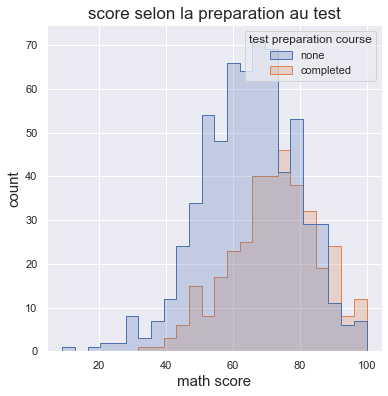

In [690]:
ax =sns.histplot(stu_perf, x="score", hue="test preparation course", element="step")
ax.set_xlabel('math score', fontsize = 15)
ax.set_ylabel('count', fontsize = 15)
ax.set_title("score selon la preparation au test", fontsize = 17)
sns.set(rc={'figure.figsize':(7,6)})
#sns.set(rc={'figure.figsize':(6,4)})

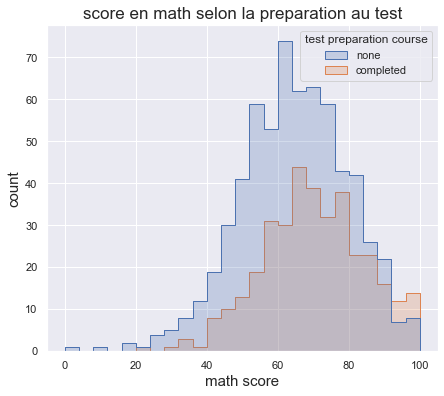

In [691]:
ax =sns.histplot(stu_perf, x="math score", hue="test preparation course", element="step")
ax.set_xlabel('math score', fontsize = 15)
ax.set_ylabel('count', fontsize = 15)
ax.set_title("score en math selon la preparation au test", fontsize = 17)
sns.set(rc={'figure.figsize':(7,6)})
#sns.set(rc={'figure.figsize':(6,4)})

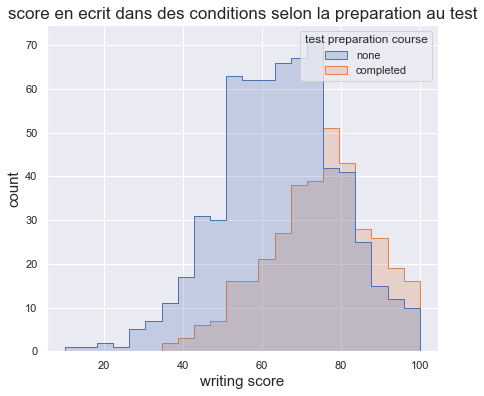

In [692]:
ax =sns.histplot(stu_perf, x="writing score", hue="test preparation course", element="step")
ax.set_xlabel('writing score', fontsize = 15)
ax.set_ylabel('count', fontsize = 15)
ax.set_title("score en ecrit dans des conditions selon la preparation au test", fontsize = 17)
sns.set(rc={'figure.figsize':(6,4)})
 

## analyses univariées

### score des eleves par raport au niveau des parents

In [693]:
stu_perf_scr.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,score
0,female,group B,bachelor's degree,standard,none,72.666667
1,female,group C,some college,standard,completed,82.333333
2,female,group B,master's degree,standard,none,92.666667
3,male,group A,associate's degree,free/reduced,none,49.333333
4,male,group C,some college,standard,none,76.333333


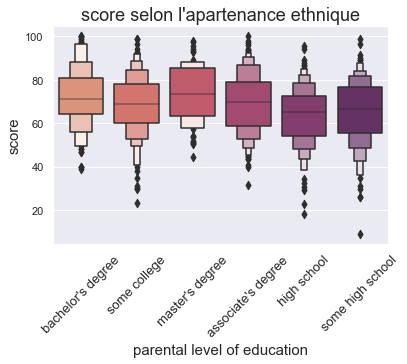

In [694]:
ax = sns.boxenplot(x="parental level of education", y="score",
                   data=stu_perf_scr, palette="flare")
ax.set_xlabel('parental level of education', fontsize = 15)
ax.set_ylabel('score', fontsize = 15)
ax.set_title("score selon l'apartenance ethnique", fontsize = 18)
plt.xticks(rotation=45, size=13)
plt.savefig("p8_figures/score selon parental level of educatione.png")
sns.set(rc={'figure.figsize':(6,12)})

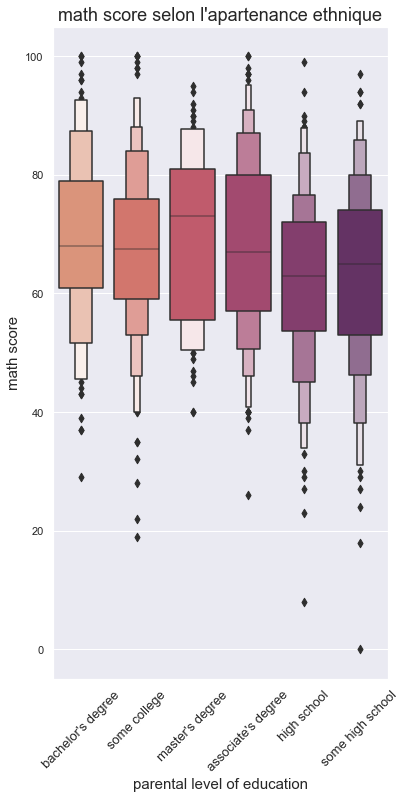

In [695]:
ax = sns.boxenplot(x="parental level of education", y="math score",
                   data=stu_perf, palette="flare")
ax.set_xlabel('parental level of education', fontsize = 15)
ax.set_ylabel('math score', fontsize = 15)
ax.set_title("math score selon l'apartenance ethnique", fontsize = 18)
plt.xticks(rotation=45, size=13)

plt.savefig("p8_figures/math score selon parental level of educatione.png")
sns.set(rc={'figure.figsize':(6,6)})

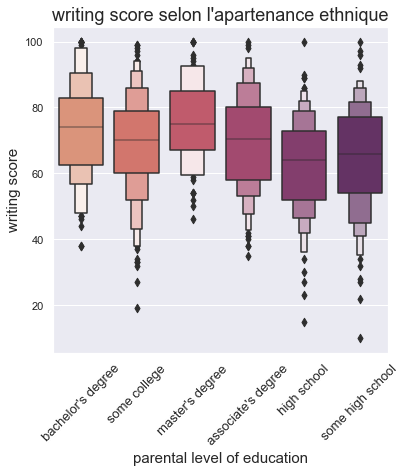

In [696]:
ax = sns.boxenplot(x="parental level of education", y="writing score",
                   data=stu_perf, palette="flare")
ax.set_xlabel('parental level of education', fontsize = 15)
ax.set_ylabel('writing score', fontsize = 15)
ax.set_title("writing score selon l'apartenance ethnique", fontsize = 18)
plt.xticks(rotation=45, size=13)

plt.savefig("p8_figures/writing score selon parental level of educatione.png")
sns.set(rc={'figure.figsize':(6,6)})

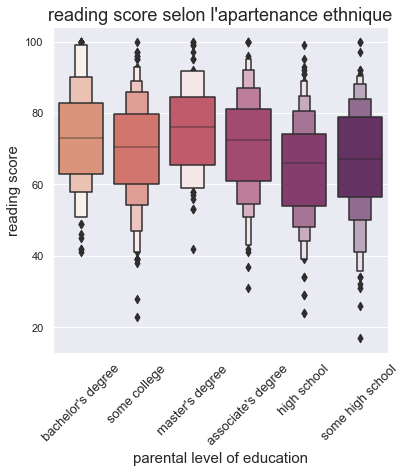

In [697]:
ax = sns.boxenplot(x="parental level of education", y="reading score",
                   data=stu_perf, palette="flare")
ax.set_xlabel('parental level of education', fontsize = 15)
ax.set_ylabel('reading score', fontsize = 15)
ax.set_title("reading score selon l'apartenance ethnique", fontsize = 18)
plt.xticks(rotation=45, size=13)

plt.savefig("p8_figures/reading score selon parental level of educatione.png")
sns.set(rc={'figure.figsize':(6,6)})

C:\Users\HAYAT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


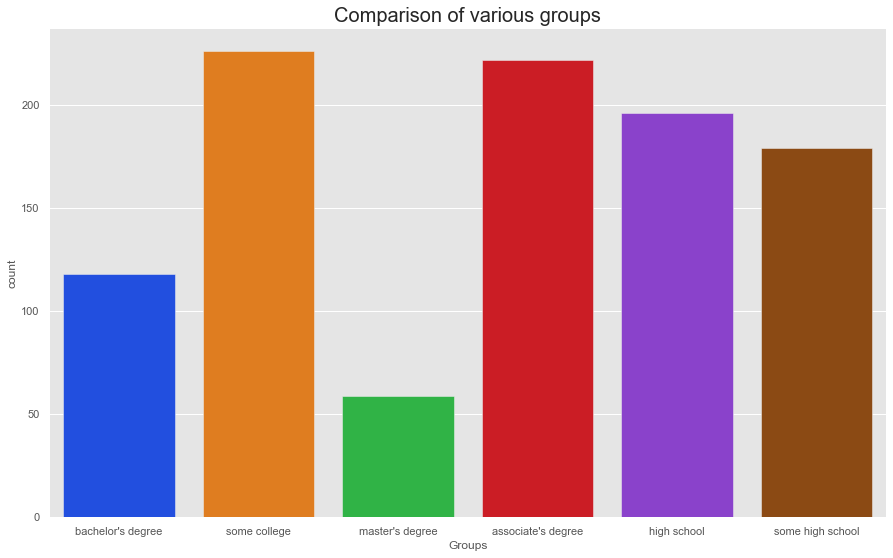

In [698]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')
sns.countplot(stu_perf_scr['parental level of education'], palette = 'bright')
plt.title('Comparison of various groups', fontweight = 30, fontsize = 20)
plt.xlabel('Groups')
plt.ylabel('count')
plt.show()

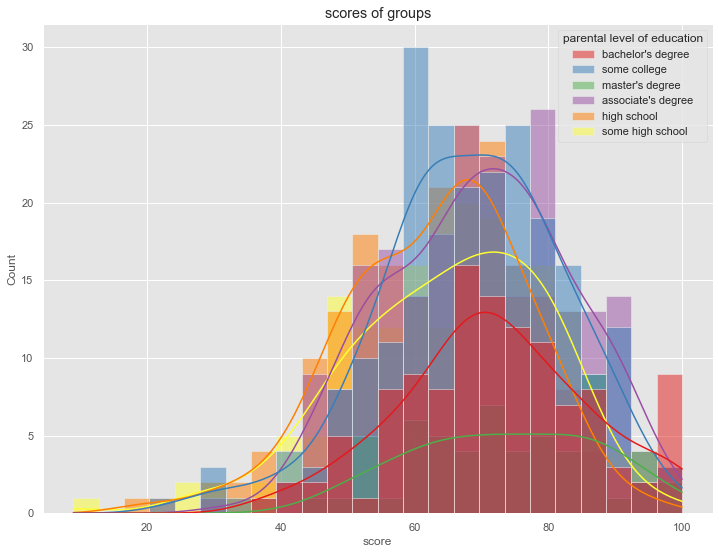

In [699]:
sns.set_palette('Set1') 
plt.figure(figsize=(12,9))
sns.histplot(x='score', data=stu_perf_scr, kde=True, hue='parental level of education')
plt.title('scores of groups')

plt.savefig("p8_figures/score selon parental level of educatione.png")
plt.show()

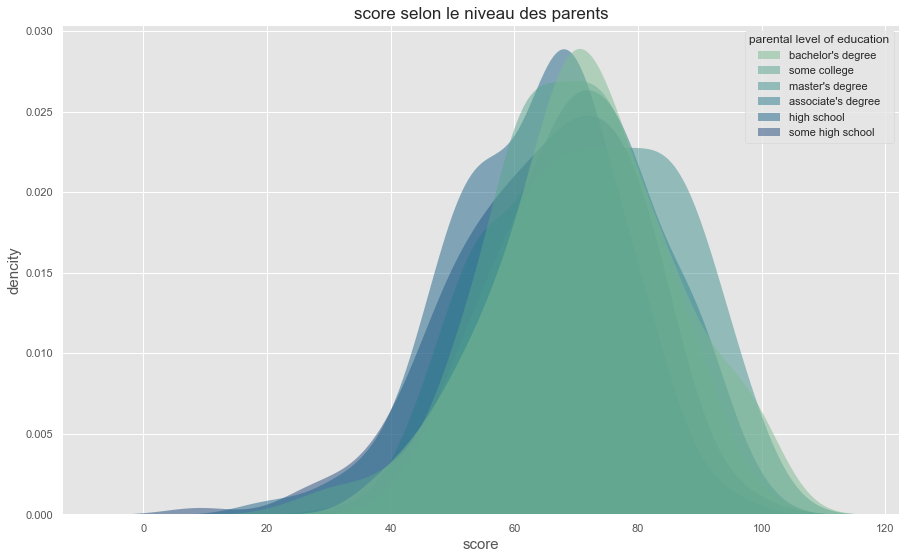

In [700]:
ax=sns.kdeplot(
   data=stu_perf_scr, x="score", hue="parental level of education",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)
ax.set_xlabel('score', fontsize = 15)
ax.set_ylabel('dencity', fontsize = 15)
ax.set_title("score selon le niveau des parents", fontsize = 17)
sns.set(rc={'figure.figsize':(15,6)})

### score des eleves par raport à l'apartenace ethnique ethnique

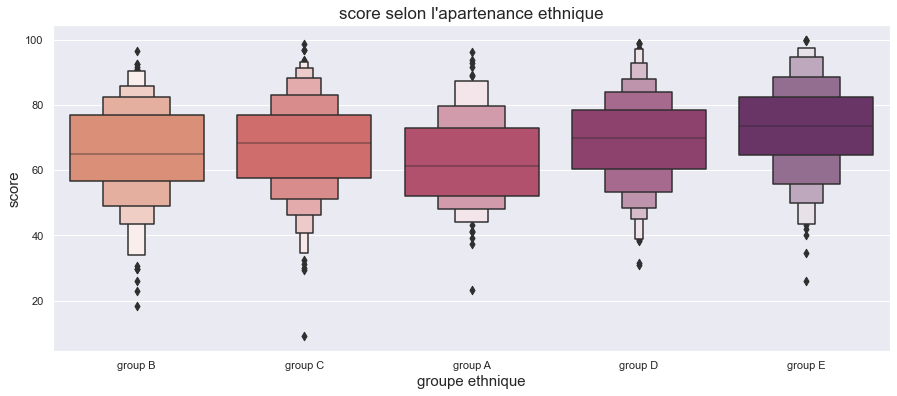

In [701]:



ax = sns.boxenplot(x="race/ethnicity", y="score",
                   data=stu_perf_scr, palette="flare")
ax.set_xlabel('groupe ethnique', fontsize = 15)
ax.set_ylabel('score', fontsize = 15)
ax.set_title("score selon l'apartenance ethnique", fontsize = 17)
plt.savefig("p8_figures/score selon l'apartenance ethnique.png")
sns.set(rc={'figure.figsize':(6,6)})

In [702]:
stu_perf.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


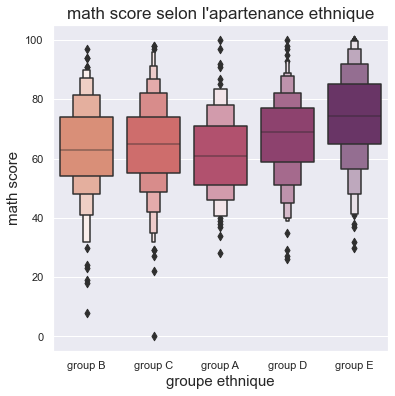

In [703]:
ax = sns.boxenplot(x="race/ethnicity", y="math score",
                   data=stu_perf, palette="flare")
ax.set_xlabel('groupe ethnique', fontsize = 15)
ax.set_ylabel('math score', fontsize = 15)
ax.set_title("math score selon l'apartenance ethnique", fontsize = 17)
plt.savefig("p8_figures/math score selon l'apartenance ethnique.png")
sns.set(rc={'figure.figsize':(6,6)})

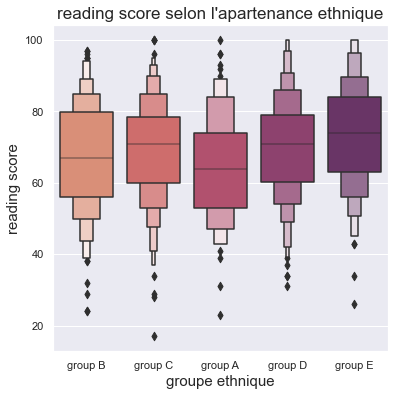

In [704]:
ax = sns.boxenplot(x="race/ethnicity", y="reading score",
                   data=stu_perf, palette="flare")
ax.set_xlabel('groupe ethnique', fontsize = 15)
ax.set_ylabel('reading score', fontsize = 15)
ax.set_title("reading score selon l'apartenance ethnique", fontsize = 17)
plt.savefig("p8_figures/reading score selon l'apartenance ethnique.png")
sns.set(rc={'figure.figsize':(6,6)})

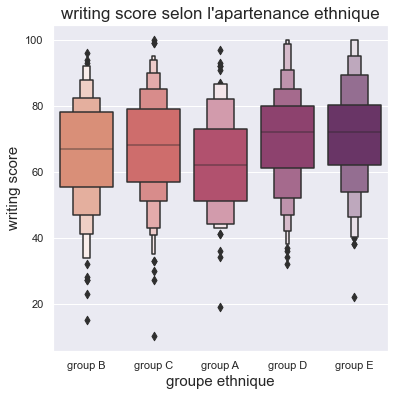

In [705]:
ax = sns.boxenplot(x="race/ethnicity", y="writing score",
                   data=stu_perf, palette="flare")
ax.set_xlabel('groupe ethnique', fontsize = 15)
ax.set_ylabel('writing score', fontsize = 15)
ax.set_title("writing score selon l'apartenance ethnique", fontsize = 17)
plt.savefig("p8_figures/writing score selon l'apartenance ethnique.png")
sns.set(rc={'figure.figsize':(6,6)})

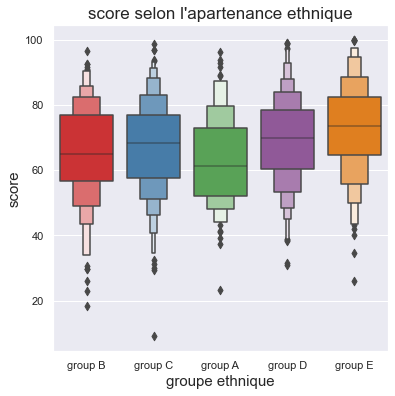

In [706]:
ax = sns.boxenplot(x="race/ethnicity", y="score",
                   data=stu_perf_scr, palette="Set1")
ax.set_xlabel('groupe ethnique', fontsize = 15)
ax.set_ylabel('score', fontsize = 15)
ax.set_title("score selon l'apartenance ethnique", fontsize = 17)
plt.savefig("p8_figures/score selon l'apartenance ethnique.png")
sns.set(rc={'figure.figsize':(6,4)})

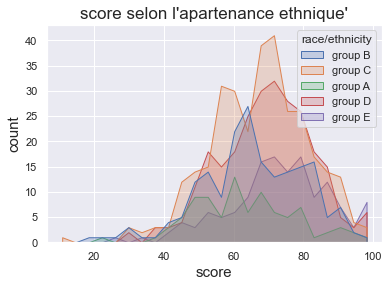

In [707]:

ax=sns.histplot(stu_perf_scr,  x="score", hue="race/ethnicity", element="poly")

ax.set_xlabel('score', fontsize = 15)
ax.set_ylabel('count', fontsize = 15)
ax.set_title("score selon l'apartenance ethnique'", fontsize = 17)
sns.set(rc={'figure.figsize':(15,6)})

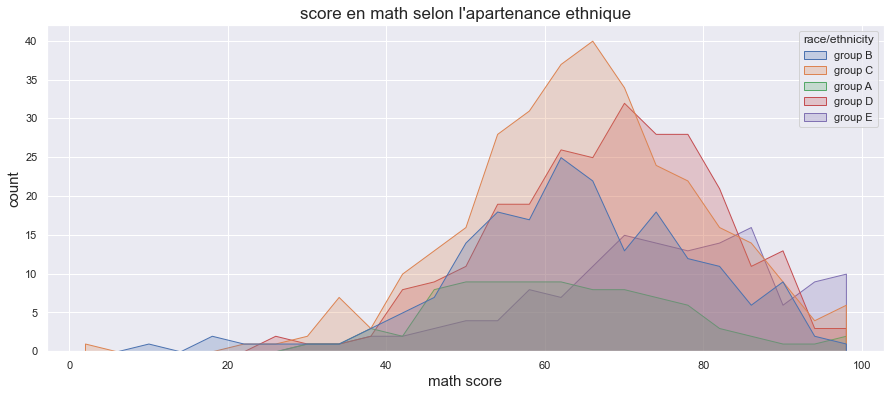

In [708]:
ax=sns.histplot(stu_perf,  x="math score", hue="race/ethnicity", element="poly")

ax.set_xlabel('math score', fontsize = 15)
ax.set_ylabel('count', fontsize = 15)
ax.set_title("score en math selon l'apartenance ethnique", fontsize = 17)
sns.set(rc={'figure.figsize':(15,6)})

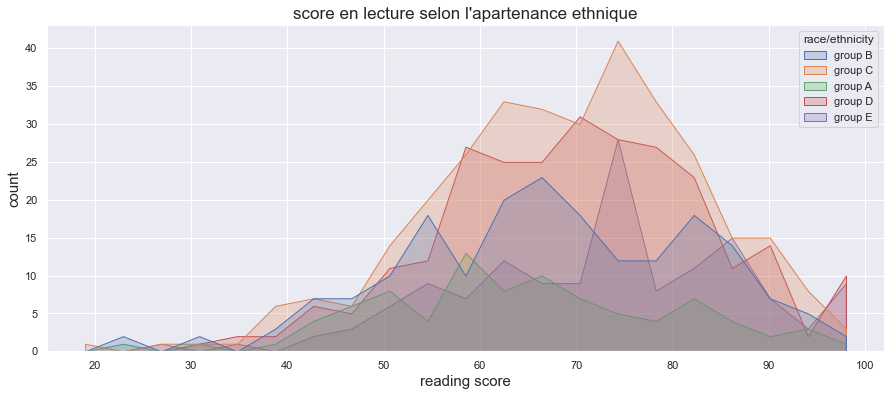

In [709]:
ax=sns.histplot(stu_perf,  x="reading score", hue="race/ethnicity", element="poly")

ax.set_xlabel('reading score', fontsize = 15)
ax.set_ylabel('count', fontsize = 15)
ax.set_title("score en lecture selon l'apartenance ethnique", fontsize = 17)
sns.set(rc={'figure.figsize':(15,6)})

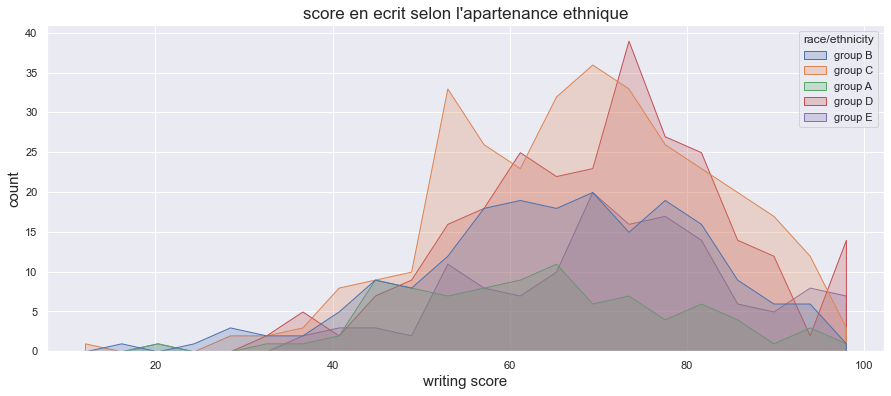

In [710]:
ax=sns.histplot(stu_perf,  x="writing score", hue="race/ethnicity", element="poly")

ax.set_xlabel('writing score', fontsize = 15)
ax.set_ylabel('count', fontsize = 15)
ax.set_title("score en ecrit selon l'apartenance ethnique", fontsize = 17)
sns.set(rc={'figure.figsize':(15,6)})

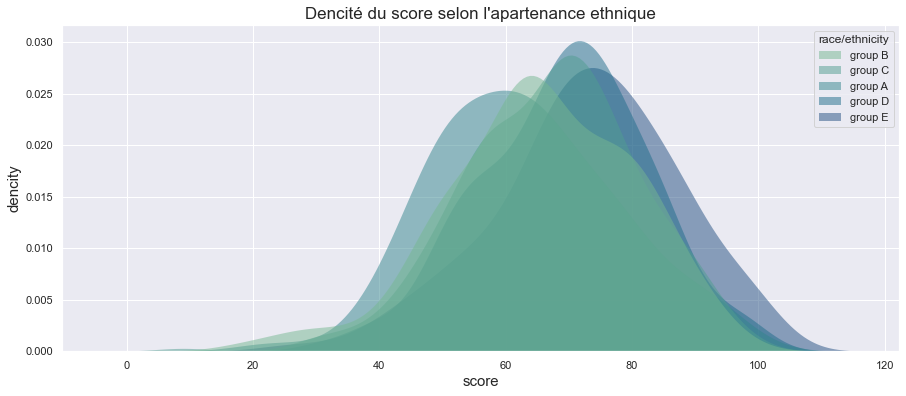

In [711]:
ax=sns.kdeplot(
   data=stu_perf_scr, x="score", hue="race/ethnicity",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)
ax.set_xlabel('score', fontsize = 15)
ax.set_ylabel('dencity', fontsize = 15)
ax.set_title("Dencité du score selon l'apartenance ethnique", fontsize = 17)
sns.set(rc={'figure.figsize':(15,6)})

## analyser les resultats en fonction des groupes ethniques pour les deux sexs dans les deux cas:repas reduit ou standard

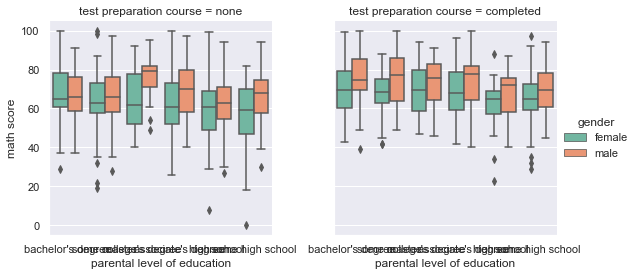

In [712]:
m0 = sns.catplot(x="parental level of education", y="math score",
                hue="gender", col="test preparation course",
                data=stu_perf, kind="box",
                height=4, palette="Set2");


## ETHNIQUE VS LEVEL OF PARENTS

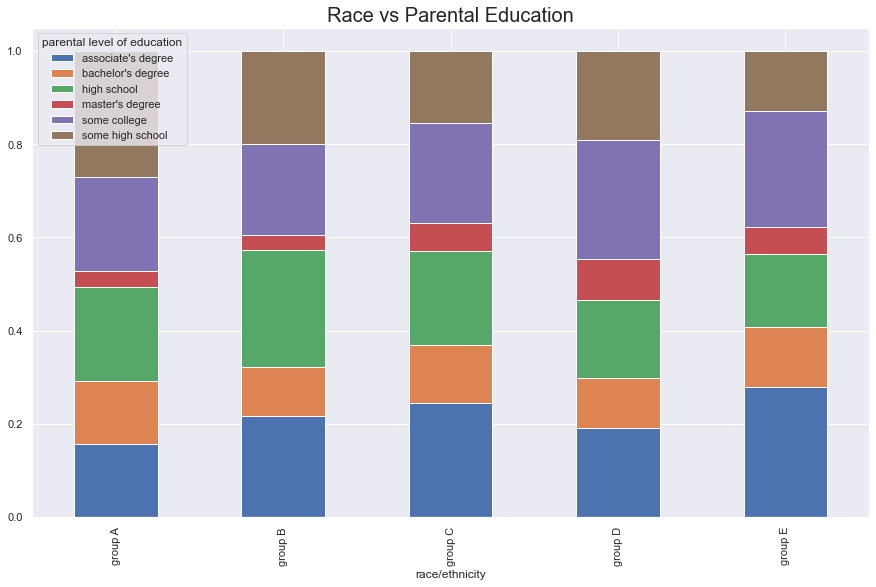

In [713]:
plt.rcParams['figure.figsize'] = (15, 9)
x = pd.crosstab(stu_perf['race/ethnicity'], stu_perf['parental level of education'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = 'True')
plt.title('Race vs Parental Education', fontweight = 30, fontsize = 20)
plt.show()

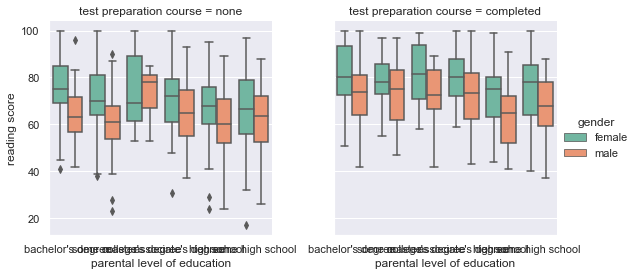

In [714]:
r0 = sns.catplot(x="parental level of education", y="reading score",
                hue="gender", col="test preparation course", kind="box",
                height=4, palette="Set2",
                data=stu_perf);

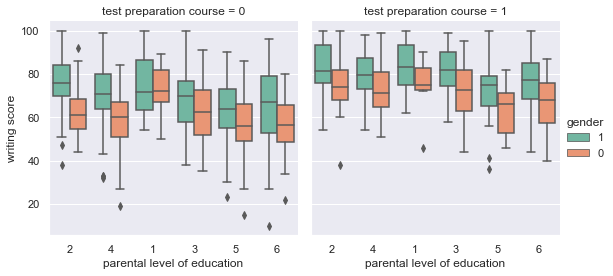

In [715]:
w0 = sns.catplot(x="parental level of education", y="writing score",
                hue="gender", col="test preparation course",
                data=stu_perf_map, kind="box",
                height=4, palette="Set2");

## analyser les resultats en fonction des groupes ethniques pour les deux sexs  dans les deux cas: Cours de préparation aux tests complété ou pas 


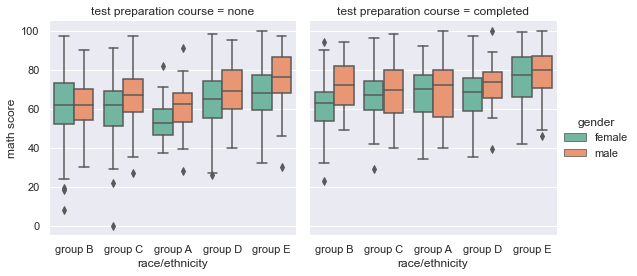

In [716]:
m1 = sns.catplot(x="race/ethnicity", y="math score",
                hue="gender", col="test preparation course",
                data=stu_perf, kind="box",
                height=4, palette="Set2");

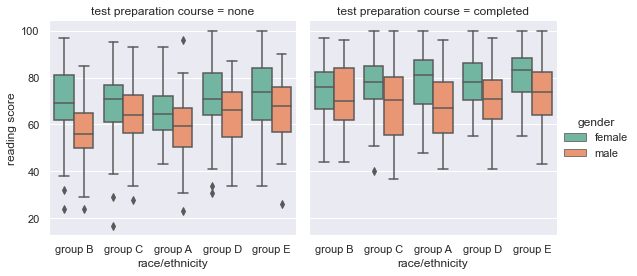

In [717]:
r1 = sns.catplot(x="race/ethnicity", y="reading score",
                hue="gender", col="test preparation course",
                data=stu_perf, kind="box",
                height=4, palette="Set2");

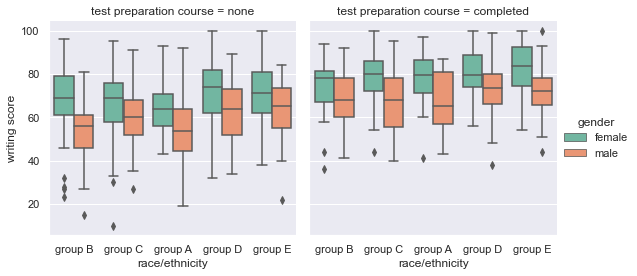

In [718]:
w1 = sns.catplot(x="race/ethnicity", y="writing score",
                hue="gender", col="test preparation course",
                data=stu_perf, kind="box",
                height=4, palette="Set2");

In [719]:
relation entre les variables 

SyntaxError: invalid syntax (1733337342.py, line 1)

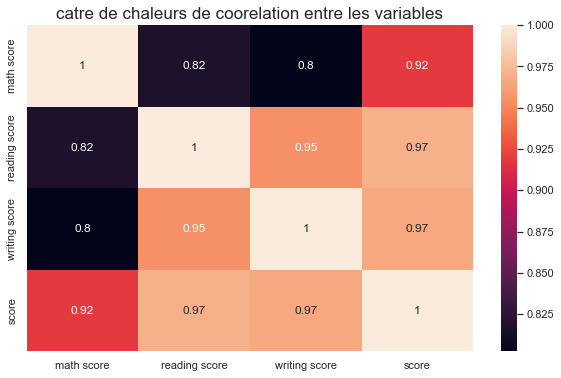

In [720]:
corr_df = stu_perf.corr(method='pearson')

plt.figure(figsize=(10, 6))
sns.heatmap(corr_df, annot=True)
plt.title('catre de chaleurs de coorelation entre les variables', fontsize = 17)
plt.savefig("p8_figures/heat_map.png")

plt.show()

# regression lineaire multiple

In [721]:
stu_perf_map.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,score
0,1,2,2,1,0,72,72,74,72.666667
1,1,3,4,1,1,69,90,88,82.333333
2,1,2,1,1,0,90,95,93,92.666667
3,0,1,3,0,0,47,57,44,49.333333
4,0,3,4,1,0,76,78,75,76.333333


In [722]:
stu_perf_ren=stu_perf_map.copy()

In [723]:
stu_perf_map.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
score                          0
dtype: int64

In [724]:
stu_perf_ren.rename(columns={'race/ethnicity':'ethnicity', 
                           'parental level of education': 'parental_level_of_education',
                           'test preparation course':'test_preparation_course',
                            'math score':'math_score',
                            'reading score':'reading_score',
                             'writing score':'writing_score'}, inplace=True)

In [725]:
stu_perf_ren.head()

,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,score
0,1,2,2,1,0,72,72,74,72.666667
1,1,3,4,1,1,69,90,88,82.333333
2,1,2,1,1,0,90,95,93,92.666667
3,0,1,3,0,0,47,57,44,49.333333
4,0,3,4,1,0,76,78,75,76.333333


In [726]:
stu_perf_ren.isna().sum()

gender                         0
ethnicity                      0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
score                          0
dtype: int64

## regression lineaire score

In [729]:
reg_s = smf.ols('score~gender+ethnicity+parental_level_of_education+lunch+test_preparation_course', data=stu_perf_ren).fit()
print(reg_s.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     26.30
Date:                Sun, 31 Jul 2022   Prob (F-statistic):           7.55e-52
Time:                        00:43:40   Log-Likelihood:                -3937.0
No. Observations:                1000   AIC:                             7900.
Df Residuals:                     987   BIC:                             7964.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

### on enleve les parametres parental level of education 

In [730]:
reg_s2 = smf.ols('score~gender+ethnicity+lunch+test_preparation_course', data=stu_perf_ren).fit()
print(reg_s2.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     35.51
Date:                Sun, 31 Jul 2022   Prob (F-statistic):           2.07e-44
Time:                        00:43:43   Log-Likelihood:                -3963.9
No. Observations:                1000   AIC:                             7944.
Df Residuals:                     992   BIC:                             7983.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

### on retire la variable ethnicity

In [731]:
reg_s3 = smf.ols('score~gender+lunch+test_preparation_course', data=stu_perf_ren).fit()
print(reg_s3.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     68.91
Date:                Sun, 31 Jul 2022   Prob (F-statistic):           1.71e-40
Time:                        00:43:45   Log-Likelihood:                -3981.4
No. Observations:                1000   AIC:                             7971.
Df Residuals:                     996   BIC:                             7990.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [732]:
reg_s4 = smf.ols('score~parental_level_of_education', data=stu_perf_ren).fit()
print(reg_s4.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.75
Date:                Sun, 31 Jul 2022   Prob (F-statistic):           4.38e-10
Time:                        00:43:46   Log-Likelihood:                -4049.4
No. Observations:                1000   AIC:                             8111.
Df Residuals:                     994   BIC:                             8140.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [733]:
#je teste la colinearité du model1 'pays' par Le facteur d'inflation de la variance
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = reg_s3.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

[1.0004978682959125, 1.000752233367395, 1.000331489738644]

## Score en math

In [760]:
reg_m = smf.ols('math_score~gender+ethnicity+parental_level_of_education+lunch+test_preparation_course', data=stu_perf_ren).fit()
print(reg_m.summary())

                            OLS Regression Results                            
Dep. Variable:             math_score   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     28.12
Date:                Sun, 31 Jul 2022   Prob (F-statistic):           2.62e-55
Time:                        00:46:17   Log-Likelihood:                -3990.3
No. Observations:                1000   AIC:                             8007.
Df Residuals:                     987   BIC:                             8070.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

## regression lineaire math score

In [735]:
reg_m = smf.ols('math_score~gender+ethnicity+parental_level_of_education+lunch+test_preparation_course+reading_score+writing_score', data=stu_perf_ren).fit()
print(reg_m.summary())

                            OLS Regression Results                            
Dep. Variable:             math_score   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     500.3
Date:                Sun, 31 Jul 2022   Prob (F-statistic):               0.00
Time:                        00:43:47   Log-Likelihood:                -3090.7
No. Observations:                1000   AIC:                             6211.
Df Residuals:                     985   BIC:                             6285.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

### RM2:on retire la variable ethnicity et niveaux des parents 

In [736]:
reg_m2= smf.ols('math_score~gender+lunch+test_preparation_course+reading_score+writing_score', data=stu_perf_ren).fit()
print(reg_m2.summary())

                            OLS Regression Results                            
Dep. Variable:             math_score   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1250.
Date:                Sun, 31 Jul 2022   Prob (F-statistic):               0.00
Time:                        00:43:48   Log-Likelihood:                -3144.2
No. Observations:                1000   AIC:                             6300.
Df Residuals:                     994   BIC:                             6330.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [737]:
#je teste la colinearité du model1 'pays' par Le facteur d'inflation de la variance
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = reg_m2.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

[1.1686545184763761,
 1.094209928496037,
 1.19946417097978,
 12.180008890074566,
 13.493721079235717]

In [738]:
il existe une corelation entre reading score et writing score 

SyntaxError: invalid syntax (4231088483.py, line 1)

In [766]:
reg_w = smf.ols('writing_score~gender+ethnicity+parental_level_of_education+lunch+test_preparation_course', data=stu_perf_ren).fit()
print(reg_w.summary())

                            OLS Regression Results                            
Dep. Variable:          writing_score   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     41.25
Date:                Sun, 31 Jul 2022   Prob (F-statistic):           8.17e-79
Time:                        21:46:07   Log-Likelihood:                -3936.2
No. Observations:                1000   AIC:                             7898.
Df Residuals:                     987   BIC:                             7962.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

## regression lineaire writing score

In [740]:
reg_w = smf.ols('writing_score~gender+ethnicity+parental_level_of_education+lunch+test_preparation_course+reading_score+math_score', data=stu_perf_ren).fit()
print(reg_w.summary())

                            OLS Regression Results                            
Dep. Variable:          writing_score   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     1281.
Date:                Sun, 31 Jul 2022   Prob (F-statistic):               0.00
Time:                        00:43:54   Log-Likelihood:                -2661.8
No. Observations:                1000   AIC:                             5354.
Df Residuals:                     985   BIC:                             5427.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

### RW2:on retire la variable ethnicity et niveaux des parents et lunch

In [741]:
reg_w2 = smf.ols('writing_score~gender+test_preparation_course+reading_score+math_score', data=stu_perf_ren).fit()
print(reg_w2.summary())

                            OLS Regression Results                            
Dep. Variable:          writing_score   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     3853.
Date:                Sun, 31 Jul 2022   Prob (F-statistic):               0.00
Time:                        00:43:55   Log-Likelihood:                -2738.1
No. Observations:                1000   AIC:                             5486.
Df Residuals:                     995   BIC:                             5511.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

## tester l'homocidacité

In [742]:
import statsmodels.formula.api as smf
from scipy.stats import t, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(reg_w2.resid, variables)
print('p value test Breusch Pagan:', pval)

p value test Breusch Pagan: 0.8687684812460058


## Tester la normalité des residues 

In [743]:
shapiro(reg_w2.resid)

ShapiroResult(statistic=0.9980385303497314, pvalue=0.29914820194244385)

In [744]:
sns.histplot(penguins, x="flipper_length_mm", hue="species", element="poly")

NameError: name 'penguins' is not defined

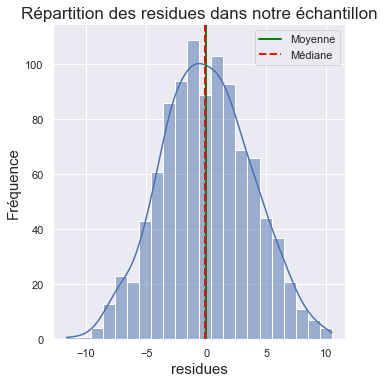

In [745]:
sns.displot(reg_w2.resid, kde=True )

plt.axvline(reg_w2.resid.mean(), label='Moyenne', linestyle='-', linewidth=2, color='green')
plt.axvline(reg_w2.resid.median(), label='Médiane', linestyle='--', linewidth=2 ,color='red')
plt.xlabel('residues',fontsize = 15)
plt.ylabel('Fréquence',fontsize = 15)
plt.title('Répartition des residues dans notre échantillon',fontsize = 17)
#plt.ylim(0,20)
plt.legend()


sns.set(rc={'figure.figsize':(12,6)})
plt.savefig('p8_figures/Distribution_rstudent.jpg')

plt.show()

### diagrame quantil quantil

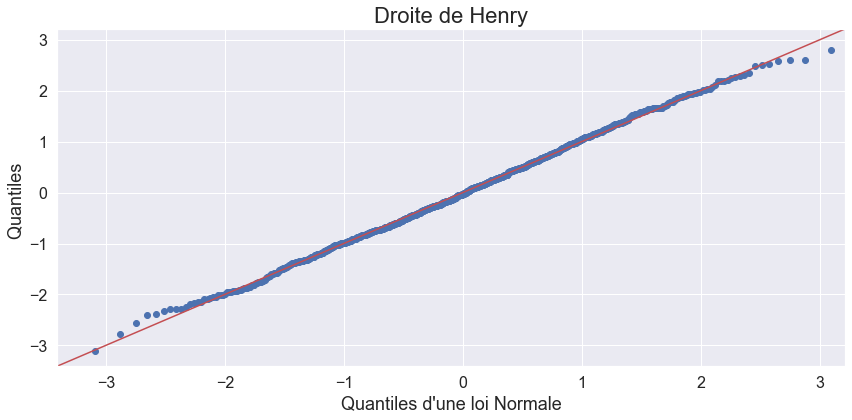

In [746]:
# Droite de Henry
fig, ax = plt.subplots(figsize=(12, 6))

sm.qqplot(reg_w2.resid, line='45', fit=True, ax=ax)

plt.ylabel('Quantiles ', fontsize=18)
plt.yticks(fontsize=16)
plt.xlabel('Quantiles d\'une loi Normale',fontsize=18)
plt.xticks(fontsize=16)
plt.title('Droite de Henry', fontsize=22)

plt.tight_layout()

plt.savefig('p8_figures/graphique_q_q.png')
plt.show()

In [747]:
#toutes les variables sont 

## tester les corelation des variables 

In [748]:
#je teste la colinearité du model1 'pays' par Le facteur d'inflation de la variance
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = reg_w2.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

[1.9070116951963179,
 1.0798633886045665,
 5.7527242154364595,
 5.3892687365181295]

# Effectuer une prediction

In [749]:
from sklearn.linear_model import LogisticRegression
X = stu_perf_ren.drop(columns = ['writing_score','ethnicity','parental_level_of_education','lunch'],axis=1).values
y = stu_perf_ren['writing_score']

logistic = LogisticRegression()
logistic.fit(X,y)

C:\Users\HAYAT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [750]:
from sklearn.datasets import load_digits
digits = load_digits()

In [751]:
from sklearn.model_selection import train_test_split
X_train, X_test1, y_train, y_test1 = train_test_split(X,y,test_size=0.20, random_state=2)

In [752]:
#importation de la classe de calcul(model a utiliser)
from sklearn.linear_model import LogisticRegression
#instanciation
lrSk = LogisticRegression(penalty='none')
#Former le modèle sur les données, stocker les informations tirées des données


#lancement des calculs

lrSk.fit(X_train,y_train)


C:\Users\HAYAT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(penalty='none')

In [753]:
X_train

array([['1', '1', 81, 91, 86.33333333333333],
       ['1', '0', 60, 72, 66.66666666666667],
       ['1', '1', 70, 82, 76.0],
       ...,
       ['1', '0', 81, 88, 86.33333333333333],
       ['1', '0', 36, 53, 44.0],
       ['1', '1', 68, 83, 76.33333333333333]], dtype=object)

In [754]:

#lancement des calculs

lrSk.fit(X_train,y_train)


#affichage des coefficients
print(pd.DataFrame({"var":X_train.columns,"coef":lrSk.coef_[0]}))

C:\Users\HAYAT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
y_pred = lrSk.predict(X_test1)
y_pred

In [755]:
y_pred

NameError: name 'y_pred' is not defined

## mesurer laperformance du model

In [756]:
# Utilisez la méthode de score pour obtenir la précision du modèle
score = lrSk.score(X_test1, y_test1)
print(score)

0.03


In [757]:
X_test1

array([['1', '0', 50, 64, 57.666666666666664],
       ['1', '1', 65, 75, 72.33333333333333],
       ['0', '1', 91, 85, 87.0],
       ['0', '0', 67, 62, 63.0],
       ['0', '0', 74, 70, 71.0],
       ['1', '0', 43, 60, 53.666666666666664],
       ['0', '0', 62, 55, 57.0],
       ['0', '1', 97, 82, 89.0],
       ['0', '1', 63, 64, 64.33333333333333],
       ['1', '0', 47, 53, 52.666666666666664],
       ['0', '0', 70, 55, 60.333333333333336],
       ['1', '0', 62, 69, 66.66666666666667],
       ['1', '1', 76, 87, 82.66666666666667],
       ['0', '0', 68, 65, 64.66666666666667],
       ['1', '0', 53, 62, 56.0],
       ['0', '0', 41, 52, 48.0],
       ['1', '1', 53, 66, 64.0],
       ['1', '1', 29, 40, 37.666666666666664],
       ['0', '0', 71, 66, 65.66666666666667],
       ['0', '1', 63, 55, 60.333333333333336],
       ['0', '1', 60, 51, 55.666666666666664],
       ['1', '0', 60, 72, 68.66666666666667],
       ['0', '0', 46, 43, 43.666666666666664],
       ['0', '0', 75, 68, 69.333333333

In [758]:
stu_perf_ren.isna().sum()

gender                         0
ethnicity                      0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
score                          0
dtype: int64

In [765]:
reg_r = smf.ols('reading_score~gender+ethnicity+parental_level_of_education+lunch+test_preparation_course', data=stu_perf_ren).fit()
print(reg_r.summary())

                            OLS Regression Results                            
Dep. Variable:          reading_score   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     24.19
Date:                Sun, 31 Jul 2022   Prob (F-statistic):           8.62e-48
Time:                        21:45:32   Log-Likelihood:                -3970.5
No. Observations:                1000   AIC:                             7967.
Df Residuals:                     987   BIC:                             8031.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

## regression lineaire reading score

In [763]:
reg_rg = smf.ols('reading_score~gender+ethnicity+parental_level_of_education+lunch+test_preparation_course', data=stu_perf_ren).fit()
print(reg_rg.summary())

                            OLS Regression Results                            
Dep. Variable:          reading_score   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     24.19
Date:                Sun, 31 Jul 2022   Prob (F-statistic):           8.62e-48
Time:                        00:51:09   Log-Likelihood:                -3970.5
No. Observations:                1000   AIC:                             7967.
Df Residuals:                     987   BIC:                             8031.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [288]:
reg_r = smf.ols('reading_score~gender+ethnicity+parental_level_of_education+lunch+test_preparation_course+writing_score+math_score', data=stu_perf_ren).fit()
print(reg_r.summary())

                            OLS Regression Results                            
Dep. Variable:          reading_score   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     887.9
Date:                Fri, 29 Jul 2022   Prob (F-statistic):               0.00
Time:                        16:16:03   Log-Likelihood:                -2793.7
No. Observations:                1000   AIC:                             5617.
Df Residuals:                     985   BIC:                             5691.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

### RR2:on retire la variable ethnicity et niveaux des parents ainssi  

In [289]:
reg_r = smf.ols('reading_score~gender+lunch+test_preparation_course+reading_score+math_score', data=stu_perf_ren).fit()
print(reg_r.summary())

                            OLS Regression Results                            
Dep. Variable:          reading_score   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.454e+30
Date:                Fri, 29 Jul 2022   Prob (F-statistic):               0.00
Time:                        16:16:04   Log-Likelihood:                 28242.
No. Observations:                1000   AIC:                        -5.647e+04
Df Residuals:                     994   BIC:                        -5.644e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

## on retire encore une fois math score

In [290]:
reg_r2 = smf.ols('reading_score~gender+lunch+test_preparation_course+reading_score', data=stu_perf_ren).fit()
print(reg_r2.summary())

                            OLS Regression Results                            
Dep. Variable:          reading_score   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.505e+31
Date:                Fri, 29 Jul 2022   Prob (F-statistic):               0.00
Time:                        16:16:06   Log-Likelihood:                 29459.
No. Observations:                1000   AIC:                        -5.891e+04
Df Residuals:                     995   BIC:                        -5.888e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

## Tester la corelation des variables

In [291]:
#je teste la colinearité du model1 'pays' par Le facteur d'inflation de la variance
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = reg_r2.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

[1.0769040149144102, 1.0701550877313202, 1.074593489814742, 1.2136030522780152]

## tester la normalité des residues 

# Analyse exploratoir des données

In [292]:
on comence par construire un dendrogramme

SyntaxError: invalid syntax (3958561372.py, line 1)

In [293]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram

def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,6))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
        
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(7,6))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
       
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

def plot_dendrogram(Z, names):
    plt.figure(figsize=(10,25))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('distance')
    dendrogram(
        Z,
        labels = names,
        orientation = "left",
    )
    plt.show()

In [294]:
stu_perf_ren.head()

,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,score
0,1,2,2,1,0,72,72,74,72.666667
1,1,3,6,1,1,69,90,88,82.333333
2,1,2,1,1,0,90,95,93,92.666667
3,0,1,3,0,0,47,57,44,49.333333
4,0,3,6,1,0,76,78,75,76.333333


In [295]:
stu_perf_ren['ind'] = range(0, len(stu))
stu_perf_ren

,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,score,ind
0,1,2,2,1,0,72,72,74,72.666667,0
1,1,3,6,1,1,69,90,88,82.333333,1
2,1,2,1,1,0,90,95,93,92.666667,2
3,0,1,3,0,0,47,57,44,49.333333,3
4,0,3,6,1,0,76,78,75,76.333333,4
...,...,...,...,...,...,...,...,...,...,...
995,1,5,1,1,1,88,99,95,94.000000,995
996,0,3,4,0,0,62,55,55,57.333333,996
997,1,3,4,0,1,59,71,65,65.000000,997
998,1,4,6,1,1,68,78,77,74.333333,998


In [296]:
stu=stu_perf_ren[['math_score','reading_score','writing_score']]
stu.head()


,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


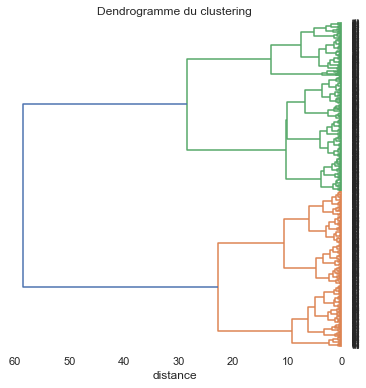

In [297]:
import pandas as pd
#from functions import plot_dendrogram
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn import preprocessing



# préparation des données pour le clustering
X = stu.values
names = stu.index

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Clustering hiérarchique
Z = linkage(X_scaled, 'ward')

# Affichage du dendrogramme

plt.figure(figsize=(6,6))
dendrogram(Z,
        labels = names,
        orientation = "left")
plt.title('Dendrogramme du clustering')
plt.xlabel('distance')


plt.savefig('p8_figures/dendogram.jpg')
plt.show()

# Analyse en composants principales 

In [298]:
data_pca=stu_perf_ren[['math_score','reading_score','writing_score']]

In [299]:
# choix du nombre de composantes à calculer
n_comp = 3

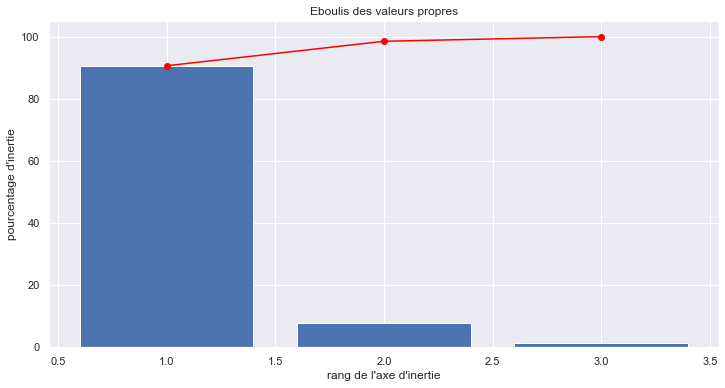

<Figure size 864x432 with 0 Axes>

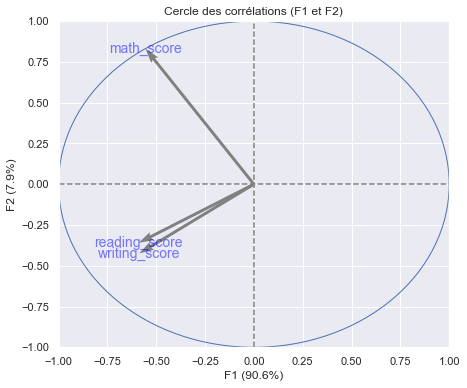

In [300]:
from sklearn import decomposition
from sklearn import preprocessing
X = data_pca.values
names =data_pca.index #pour avoir les intitulés
features = data_pca.columns
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)


# Eboulis des valeurs propres
display_scree_plot(pca)


# Cercle des corrélations(on prend un seul plan)
pcs = pca.components_

plt.savefig('p8_figures/Cercle_de_corelation.jpg')
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))
#display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))


In [301]:
# Projection des individus
X_projected = pca.transform(X_scaled)

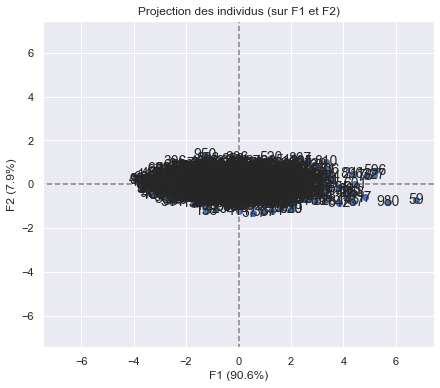

<Figure size 864x432 with 0 Axes>

In [302]:
#display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(names))
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], labels = np.array(names))
plt.savefig('p8_figures/pca_projection.jpg')
plt.show()

## clustering avec le Kmeans

In [303]:
from sklearn.cluster import KMeans

# Nombre de clusters souhaités
n_clust2 = 2

# préparation des données pour le clustering
X = stu.values

# Réduire n'est ici pas nécessaire car les variables sont exprimées dans la même unité
# On prépare les données en faisant une normalisation (centrage-réduction)
#X_scaled = preprocessing.StandardScaler().fit(X)
X_scaled = preprocessing.StandardScaler().fit_transform(X)

# Clustering par K-means
km2 = KMeans(n_clusters=n_clust2)
km2.fit(X_scaled)

# Récupération des clusters attribués à chaque individu
clusters_K2 = km2.labels_

# PCA sur 2 cluster

In [304]:
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(n_components=3)

## eboulis des valeurs propres

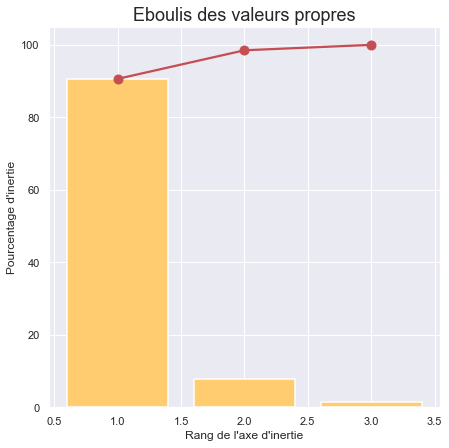

In [305]:
fig, ax = plt.subplots(figsize=(7,7))
sns.set_context('talk')

scree = pca.explained_variance_ratio_*100
plt.bar(np.arange(len(scree))+1, scree, color='#FFCC6F')
plt.plot(np.arange(len(scree))+1, scree.cumsum(),marker='o', color='r')
plt.xlabel("Rang de l'axe d'inertie")
plt.ylabel("Pourcentage d'inertie")

plt.title("Eboulis des valeurs propres")

plt.savefig('p8_figures/EBOULIE DES VALEURES PROPRES.jpg')
plt.show(block=False)

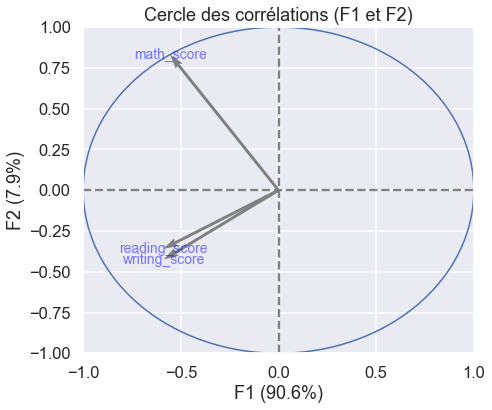

<Figure size 864x432 with 0 Axes>

In [306]:
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))

plt.savefig('p8_figures/cercle de corrélations.jpg')

In [307]:
stu_perf_ren['clusters_K2']=clusters_K2

In [308]:
stu_perf_ren.head()

,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,score,ind,clusters_K2
0,1,2,2,1,0,72,72,74,72.666667,0,0
1,1,3,6,1,1,69,90,88,82.333333,1,0
2,1,2,1,1,0,90,95,93,92.666667,2,0
3,0,1,3,0,0,47,57,44,49.333333,3,1
4,0,3,6,1,0,76,78,75,76.333333,4,0


In [309]:

illustrative_var_K2 = stu_perf_ren['clusters_K2']

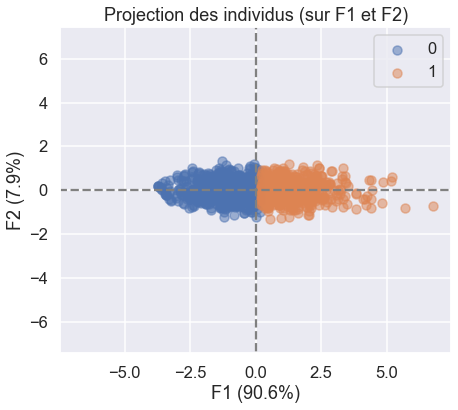

<Figure size 864x432 with 0 Axes>

In [310]:

# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], illustrative_var = illustrative_var_K2 , alpha = 0.5)

plt.savefig('p8_figures/cluster2.jpg')

plt.show()


## K3

In [311]:
# Nombre de clusters souhaités
n_clust3 = 3

# préparation des données pour le clustering
X = stu.values

# Réduire n'est ici pas nécessaire car les variables sont exprimées dans la même unité
# On prépare les données en faisant une normalisation (centrage-réduction)
#X_scaled = preprocessing.StandardScaler().fit(X)
X_scaled = preprocessing.StandardScaler().fit_transform(X)

# Clustering par K-means
km3 = KMeans(n_clusters=n_clust3)
km3.fit(X_scaled)

# Récupération des clusters attribués à chaque individu
clusters_K3 = km3.labels_

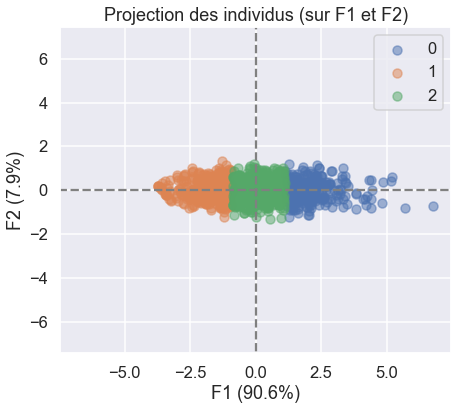

<Figure size 864x432 with 0 Axes>

In [312]:
pcs = pca.components_

stu_perf_ren['clusters_K3']=clusters_K3
illustrative_var_K3 = stu_perf_ren['clusters_K3']
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], illustrative_var = illustrative_var_K3 , alpha = 0.5)


plt.savefig('p8_figures/cluster3.jpg')
plt.show()

# K4

In [313]:
# Nombre de clusters souhaités
n_clust4 = 4

# préparation des données pour le clustering
X = stu.values

# Réduire n'est ici pas nécessaire car les variables sont exprimées dans la même unité
# On prépare les données en faisant une normalisation (centrage-réduction)
#X_scaled = preprocessing.StandardScaler().fit(X)
X_scaled = preprocessing.StandardScaler().fit_transform(X)

# Clustering par K-means
km4 = KMeans(n_clusters=n_clust4)
km4.fit(X_scaled)

# Récupération des clusters attribués à chaque individu
clusters_K4 = km4.labels_

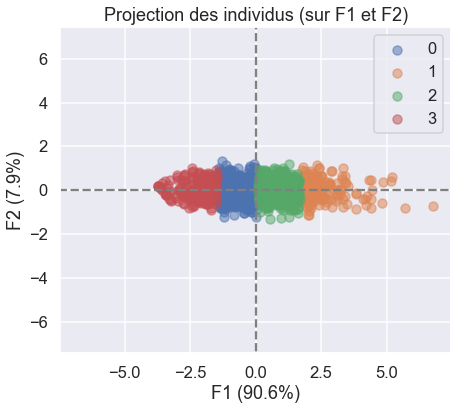

<Figure size 864x432 with 0 Axes>

In [314]:


pcs = pca.components_

stu_perf_ren['clusters_K4']=clusters_K4
illustrative_var_K4 = stu_perf_ren['clusters_K4']
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], illustrative_var = illustrative_var_K4 , alpha = 0.5)


plt.savefig('p8_figures/cluster4.jpg')
plt.show()

In [315]:
critere du coude  il ya 2 qui se rassemblent 
le niveau generele 

SyntaxError: invalid syntax (324263909.py, line 1)

# K5:

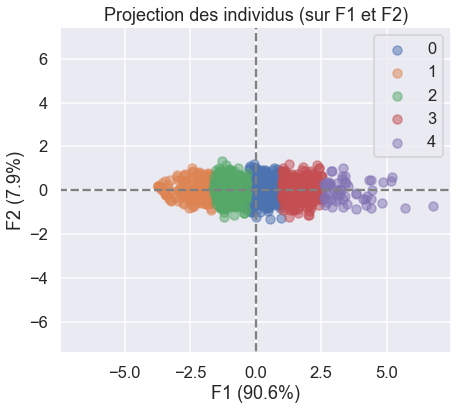

<Figure size 864x432 with 0 Axes>

In [316]:
# Nombre de clusters souhaités
n_clust5 = 5

# préparation des données pour le clustering
X = stu.values

# Réduire n'est ici pas nécessaire car les variables sont exprimées dans la même unité
# On prépare les données en faisant une normalisation (centrage-réduction)
#X_scaled = preprocessing.StandardScaler().fit(X)
X_scaled = preprocessing.StandardScaler().fit_transform(X)

# Clustering par K-means
km5 = KMeans(n_clusters=n_clust5)
km5.fit(X_scaled)

# Récupération des clusters attribués à chaque individu
clusters_K5 = km5.labels_


stu_perf_ren['clusters_K5']=clusters_K5
illustrative_var_K5 = stu_perf_ren['clusters_K5']
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], illustrative_var = illustrative_var_K5 , alpha = 0.5)

plt.savefig('p8_figures/cluster5.jpg')

plt.show()

In [317]:
stu_perf['cluster_4']=clusters_K4

In [318]:
stu_perf.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,score,cluster_4
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,0
1,female,group C,some college,standard,completed,69,90,88,82.333333,3
2,female,group B,master's degree,standard,none,90,95,93,92.666667,3
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,1
4,male,group C,some college,standard,none,76,78,75,76.333333,0


# Analyser les cluster

In [ ]:
stu_perf

In [346]:
#GROUPER PAR CLUSTERS
clust_df = stu_perf.groupby("cluster_4")[stu_perf.columns[5:9]].mean()
clust_df

,math score,reading score,writing score,score
cluster_4,,,,
0,71.365169,74.938202,73.994382,73.432584
1,44.503145,46.981132,44.566038,45.350105
2,59.217391,61.866221,60.943144,60.675585
3,85.489247,88.833333,88.193548,87.505376


In [347]:
#classifier 

clust_df['rank'] = clust_df["score"].rank(method='max')
clust_df

,math score,reading score,writing score,score,rank
cluster_4,,,,,
0,71.365169,74.938202,73.994382,73.432584,3.0
1,44.503145,46.981132,44.566038,45.350105,1.0
2,59.217391,61.866221,60.943144,60.675585,2.0
3,85.489247,88.833333,88.193548,87.505376,4.0


# cluster et niveau des parents 

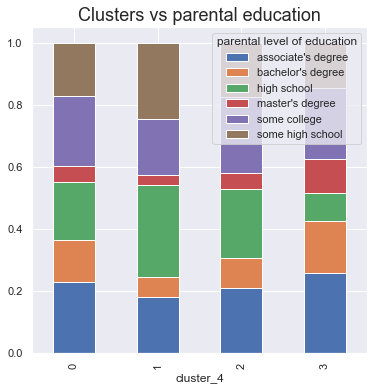

In [334]:
plt.rcParams['figure.figsize'] = (6, 6)
x = pd.crosstab(stu_perf['cluster_4'], stu_perf['parental level of education'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = 'True')
plt.title('Clusters vs parental education', fontweight = 30, fontsize = 18)

plt.savefig("p8_figures/clusters vs parental education.png")
plt.show()

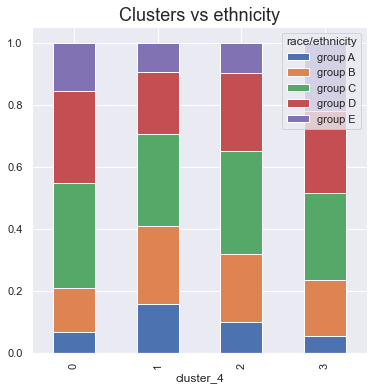

In [333]:
plt.rcParams['figure.figsize'] = (6, 6)
x = pd.crosstab(stu_perf['cluster_4'], stu_perf['race/ethnicity'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = 'True')
plt.title('Clusters vs ethnicity', fontweight = 30, fontsize = 18)

plt.savefig("p8_figures/clusters vs ethnicity.png")
plt.show()

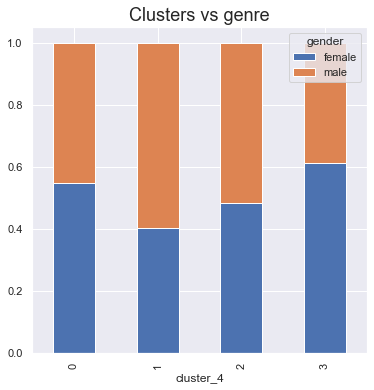

In [341]:
plt.rcParams['figure.figsize'] = (6, 6)
x = pd.crosstab(stu_perf['cluster_4'], stu_perf['gender'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = 'True')
plt.title('Clusters vs genre', fontweight = 30, fontsize = 18)

plt.savefig("p8_figures/clusters vs genre.png")
plt.show()

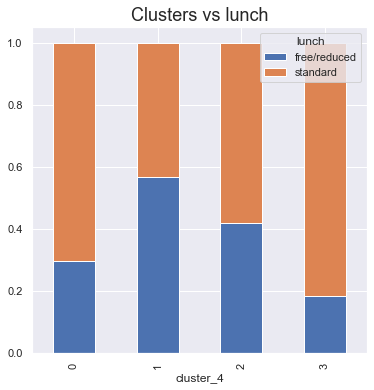

In [344]:
plt.rcParams['figure.figsize'] = (6, 6)
x = pd.crosstab(stu_perf['cluster_4'], stu_perf['lunch'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = 'True')
plt.title('Clusters vs lunch', fontweight = 30, fontsize = 18)

plt.savefig("p8_figures/Clusters vs lunch.png")
plt.show()

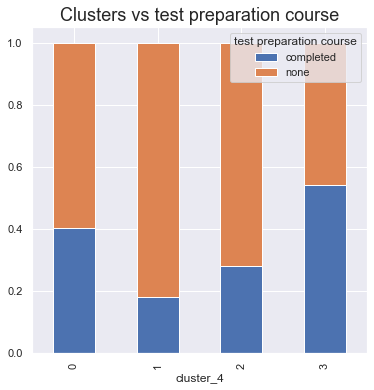

In [345]:
plt.rcParams['figure.figsize'] = (6, 6)
x = pd.crosstab(stu_perf['cluster_4'], stu_perf['test preparation course'])

x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = 'True')
plt.title('Clusters vs test preparation course', fontweight = 30, fontsize = 18)

plt.savefig("p8_figures/Clusters vs test preparation course.png")
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

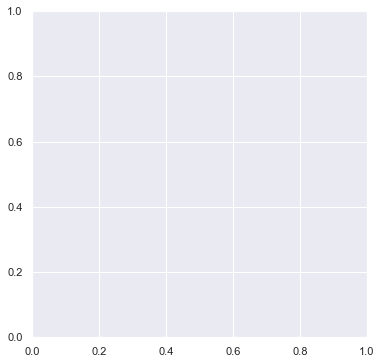

In [362]:
ind = np.arange(8)
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, stu_perf['math score'], width, label='Math')
rects2 = ax.bar(ind, stu_perf['reading score'], width, label='Reading')
rects3 = ax.bar(ind + width/2, stu_perf['writing'], width, label='Writing')

ax.set_xlabel('Classiffication')
ax.set_ylabel('Scores')
ax.set_xticks(ind)
ax.legend()
plt.show()

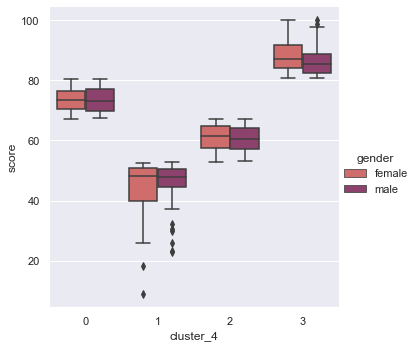

In [381]:
ax = sns.catplot(x="cluster_4", y="score",
                hue="gender",
                data=stu_perf, kind="box",
                height=5, palette="flare");
plt.savefig("p8_figures/cluster vs clus gender vs test .png")

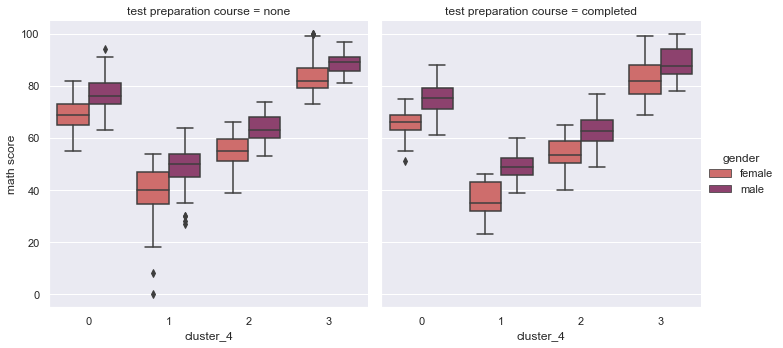

In [372]:
ax = sns.catplot(x="cluster_4", y="math score",
                hue="gender", col="test preparation course",
                data=stu_perf, kind="box",
                height=5, palette="flare");
plt.savefig("p8_figures/cluster vs mathsore gender vs test .png")

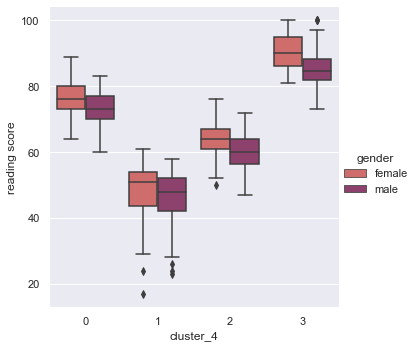

In [380]:
ax = sns.catplot(x="cluster_4", y="reading score",
                hue="gender", 
                data=stu_perf, kind="box",
                height=5, palette="flare");
plt.savefig("p8_figures/cluster vs readscor gender vs test .png")

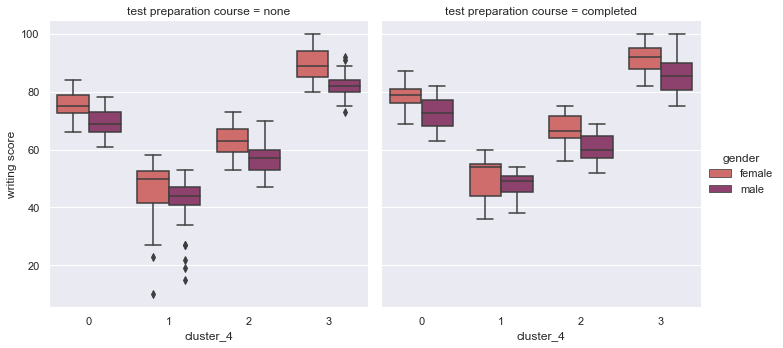

In [375]:
ax = sns.catplot(x="cluster_4", y="writing score",
                hue="gender", col="test preparation course",
                data=stu_perf, kind="box",
                height=5, palette="flare");
plt.savefig("p8_figures/cluster vs clus writing vs test .png")

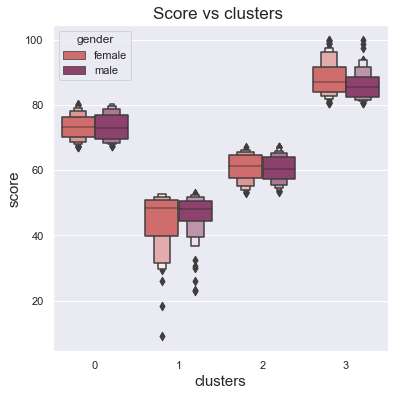

In [399]:
ax = sns.boxenplot(x="cluster_4", y="score",hue="gender",
                   data=stu_perf, palette="flare")
ax.set_xlabel('clusters', fontsize = 15)
ax.set_ylabel('score', fontsize = 15)
ax.set_title("Score vs clusters ", fontsize = 17)
plt.savefig("p8_figures/clust score vs genre.png")
sns.set(rc={'figure.figsize':(6,6)})

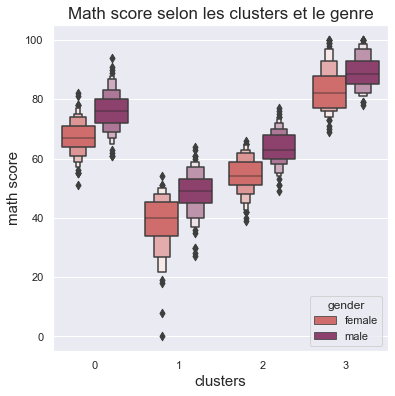

In [400]:
ax = sns.boxenplot(x="cluster_4", y="math score",hue="gender",
                   data=stu_perf, palette="flare")
ax.set_xlabel('clusters', fontsize = 15)
ax.set_ylabel('math score', fontsize = 15)
ax.set_title("Math score selon les clusters et le genre", fontsize = 17)
plt.savefig("p8_figures/clust mt score vs genre.png")
sns.set(rc={'figure.figsize':(6,6)})

In [417]:
stu_perf.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
score                          0
cluster_4                      0
dtype: int64

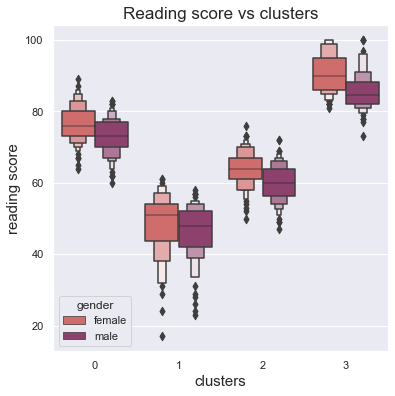

In [401]:
ax = sns.boxenplot(x="cluster_4", y="reading score",hue="gender",
                   data=stu_perf, palette="flare")
ax.set_xlabel('clusters', fontsize = 15)
ax.set_ylabel('reading score', fontsize = 15)
ax.set_title("Reading score vs clusters", fontsize = 17)
plt.savefig("p8_figures/clust read score vs genre.png")
sns.set(rc={'figure.figsize':(6,6)})

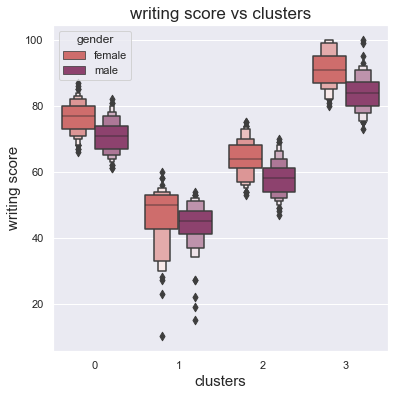

In [402]:
ax = sns.boxenplot(x="cluster_4", y="writing score",hue="gender",
                   data=stu_perf, palette="flare")
ax.set_xlabel('clusters', fontsize = 15)
ax.set_ylabel('writing score', fontsize = 15)
ax.set_title("writing score vs clusters", fontsize = 17)
plt.savefig("p8_figures/clust writ score vs genre.png")
sns.set(rc={'figure.figsize':(6,6)})

In [ ]:
#GROUPER PAR CLUSTERS
clust_df = stu_perf.groupby("cluster_4")[stu_perf.columns[5:9]].mean()
clust_df

In [ ]:
#classifier 

clust_df['rank'] = clust_df["score"].rank(method='max')
clust_df

In [ ]:
          
  1 Exploration des données   
    
  1.1.Nettoyage des données  
    
    
    
    2 Analyses multivariées
2.1Analyse des résultats selon le du genre
 
    
    
    2.2 Analyse des résultats selon le type de repas 
    
    
    2.3 Analyser les résultats selon leurs préparation à l'examen

    
    
    2.4 Analyser les résultats selon le niveau des parents:  

    
    2.5 Analyse des résultats selon leurs appartenance ethnique: 
    
  2.6 Analyse des scores   
3 Analyser les facteurs influant les résultats   
3.1 Régression linéaire pour le Score en math   
3.3 Régression linéaire pour score en reading    
3.4 Synthèse

4 Analyse exploratoire des données

4.1 La corrélation entre les variables

4.2 Analyse en Composantes Principales 

4.3 Clustering avec le k-means

4.5 Analyser les clusters
4.5 Analyser les clusters
Conclusion 

In [ ]:
asoiation entre moyenne, cluster 

In [ ]:
faire une 1 er contextepourquoi choisir 

In [ ]:
faire un descriptif selectioner les grphiques descriptifs 

donnees 

In [ ]:
partie analyse :clustering 

In [ ]:
descussion et conclusion : quelle infio tirer et conclusion

In [ ]:
faire une boite a moustache 

In [ ]:
tester par l anova 

In [ ]:
diagrame en bare 

In [ ]:
test qaui 2 SI IL YA UN EASCOCIATION comparer les rpoportions  